 1.1 **Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline
import numpy as np
np.random.seed(42)



**Load the data**

In [2]:


df = pd.read_csv('../data/Molecules_data.csv',index_col=0)
df.head()


,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22,Class
0,0.0908,0,0.0075,0.0173,0,0.0,-0.0436,0.0409,0.0000,0.1368,...,0.0000,0.0000,0.1780,1.5488,0.0088,0,0.0,-0.0868,0.00,NonToxic
1,0.0213,0,0.1144,-0.0410,0,0.0,0.1231,-0.0316,0.0000,0.1318,...,8.8660,19.3525,0.1739,1.3718,0.0048,2,0.0,-0.0810,0.25,NonToxic
2,0.0018,0,-0.0156,-0.0765,2,0.0,-0.1138,-0.1791,0.0000,0.0615,...,5.2267,27.8796,0.1688,1.4395,0.0116,2,0.0,-0.1004,0.00,NonToxic
3,-0.0251,0,-0.0064,-0.0894,3,0.0,-0.0747,-0.1151,0.0000,0.0361,...,7.7896,24.7336,0.1702,1.4654,0.0133,2,0.0,-0.1010,0.00,NonToxic
4,-0.0028,2,-0.0164,-0.0912,2,0.0,-0.0356,-0.0159,6.0139,0.0922,...,15.6022,6.2113,0.1755,1.4774,0.0133,0,0.0,-0.0980,0.00,NonToxic


In [3]:
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 0 to 158
Columns: 1204 entries, MATS3v to Class
dtypes: float64(1003), int64(200), object(1)
memory usage: 1.5+ MB


,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-3,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,...,159.000000,159.00000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,-0.032016,0.327044,-0.000701,-0.061154,1.018868,0.704031,-0.023251,-0.049010,1.609214,0.002133,...,23.222747,8.09434,13.417422,0.203552,1.229619,0.011494,1.471698,0.005184,-0.085793,0.060818
std,0.063713,0.775388,0.062758,0.072679,1.122112,1.678990,0.077983,0.101976,2.513948,0.074040,...,6.581596,4.42080,6.321318,0.024548,0.137841,0.005521,1.011399,0.046112,0.029645,0.247864
min,-0.311500,0.000000,-0.184600,-0.348500,0.000000,0.000000,-0.211900,-0.338700,-0.708700,-0.198700,...,0.000000,0.00000,0.000000,0.163600,0.811500,0.001400,0.000000,0.000000,-0.202700,0.000000
25%,-0.068500,0.000000,-0.035300,-0.099550,0.000000,0.000000,-0.066300,-0.115350,0.000000,-0.052350,...,19.045300,5.16470,8.020450,0.183800,1.142150,0.007750,1.000000,0.000000,-0.099700,0.000000
50%,-0.033400,0.000000,-0.002200,-0.060300,1.000000,0.000000,-0.037200,-0.042300,0.000000,-0.001800,...,23.180800,7.82760,13.342700,0.201900,1.234000,0.010700,1.000000,0.000000,-0.082500,0.000000
75%,0.005550,0.000000,0.027950,-0.016300,2.000000,0.000000,0.002650,0.014950,4.911250,0.056550,...,26.974500,10.54115,19.319450,0.220550,1.324150,0.014150,2.000000,0.000000,-0.066900,0.000000
max,0.108800,4.000000,0.218100,0.129000,6.000000,8.141400,0.249500,0.201000,7.740800,0.166300,...,41.380000,20.80540,27.879600,0.272100,1.548800,0.034600,5.000000,0.429200,-0.007300,2.636100


**Data Cleaning**

**Check missing values**

In [4]:
print(df.isnull().sum())#no missing values 

MATS3v             0
nHBint10           0
MATS3s             0
MATS3p             0
nHBDon_Lipinski    0
                  ..
nT5Ring            0
SHdNH              0
ETA_dEpsilon_C     0
MDEO-22            0
Class              0
Length: 1204, dtype: int64


**Encode categorical variables**

In [5]:
# class is the only categorical variable =>encode 
df['Class'] = df['Class'].map({'NonToxic': 0, 'Toxic': 1})

**spearate features and class column /standardize**

In [6]:


X=df.drop('Class',axis=1)
Y=df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**check for imbalance**

In [7]:
df['Class'].value_counts()# there is imbalance

Class
0    108
1     51
Name: count, dtype: int64

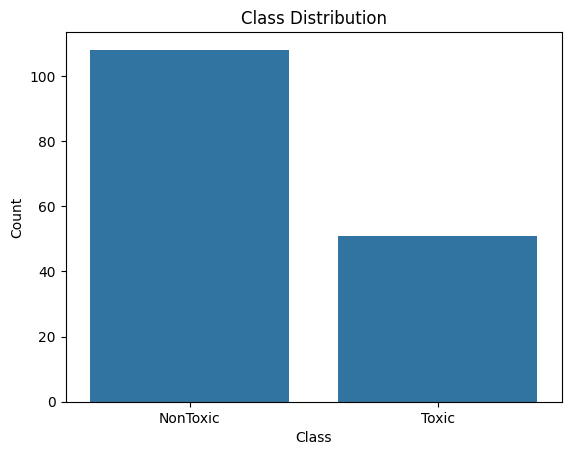

In [8]:
sns.countplot(x='Class', data=df)
plt.xticks([0, 1], ['NonToxic', 'Toxic'])  # replace 0/1 with labels
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

